In [1]:
# install tensorflow Dont execute if already done
!pip install tensorflow

In [2]:
# install keras
!pip install keras

In [3]:
# import required libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#load MNIST dataset
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
# Number of training samples
len(X_train)

60000

In [6]:
# Number of testing samples
len(X_test)

10000

In [7]:
# datatype
type(X_train)

numpy.ndarray

In [8]:
# Accessing individual samples
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
# Shape of the training data
X_train.shape

(60000, 28, 28)

In [10]:
# shape of individual sample
X_train[0].shape

(28, 28)

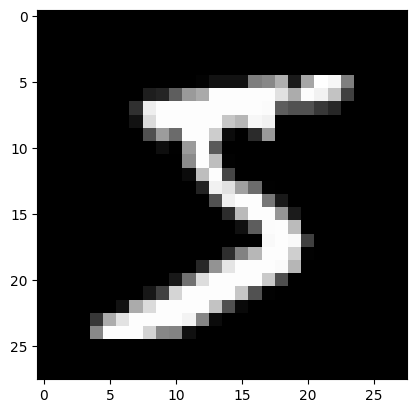

In [11]:
# Show the gray scale image of handwritten digit
plt.imshow(X_train[0], cmap='gray')

In [12]:
# check the corresponding label
y_train[0]

5

In [13]:
# shape of training labels
y_train.shape

(60000,)

In [14]:
# Normalizing each pixel value in between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [15]:
# Sample data post normalization
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
# Building an ANN model
'''
firstly we initialize a sequential model.
Sequential() initializes a linear stack of layers in the model. 
This is suitable for a plain stack of layers 
where each layer has exactly one input tensor and one output tenso
'''
model=Sequential()


'''
Flatten is used to transform the 2D input of 28x28 pixels into a 1D array. 
This is necessary because the following Dense layers expect 1D input
'''
model.add(Flatten(input_shape=(28,28)))

'''
Dense adds a fully connected neural network layer with 150 units (or neurons). 
The activation='relu' parameter applies the Rectified Linear Unit (ReLU) activation function, 
which introduces non-linearity to the model, allowing it to learn more complex patterns1.
'''
model.add(Dense(units=150,activation='relu'))



'''
Another Dense layer with 100 units and ReLU activation. 
This additional layer increases the model’s capacity to learn from the data.
'''
model.add(Dense(units=100,activation='relu'))



'''
The final Dense layer has 10 units, corresponding to the 10 classes of digits (0-9). 
The activation='softmax' parameter applies the softmax function,
which is used for multi-class classification problems. 
It outputs a probability distribution over the 10 classes
'''
model.add(Dense(units=10,activation='softmax'))

# summarizing the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 133,860
Trainable params: 133,860
Non-trainable params: 0
_________________________________________________________________


In [17]:
# configuring the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'''
The model.compile method is configuring the model for training.

optimizer SGD-- SGD stands for Stochastic Gradient Descent, 
a method for optimizing the model’s weights incrementally based on the training data.

loss sparse_categorical_crossentropy-- This is the loss function used to measure how well the 
model is performing. 
Sparse categorical crossentropy is used when your classes are mutually exclusive 
(e.g., when each sample belongs exactly to one class), and the labels are provided as integers.

metrics=['accuracy']: Metrics are used to monitor the training and testing steps. 
Accuracy is one of the most common metrics, and it calculates how often predictions equal labels.
'''

"\nThe model.compile method is configuring the model for training.\n\noptimizer SGD-- SGD stands for Stochastic Gradient Descent, \na method for optimizing the model’s weights incrementally based on the training data.\n\nloss sparse_categorical_crossentropy-- This is the loss function used to measure how well the \nmodel is performing. \nSparse categorical crossentropy is used when your classes are mutually exclusive \n(e.g., when each sample belongs exactly to one class), and the labels are provided as integers.\n\nmetrics=['accuracy']: Metrics are used to monitor the training and testing steps. \nAccuracy is one of the most common metrics, and it calculates how often predictions equal labels.\n"

In [18]:
# model training
model.fit(X_train,y_train,epochs=10,validation_split=0.2,verbose=1)

'''
The model.fit function is used to train the model for a fixed number of epochs 
(iterations on a dataset). 

X_train: The input data, which in the case of MNIST, 

y_train: indicating the digit each image represents.

epochs=10: This specifies that the model should be trained for 10 complete passes 
through the entire training dataset.

validation_split=0.2: This tells Keras to set aside 20% of the training data as a validation set. 
The model will not train on this data, but it will report the loss and any other metrics specified 
in model.compile on this data after each epoch.

verbose=1: This sets the verbosity mode. verbose=1 will show a progress bar during training.
A progress bar and one line per epoch are shown. 
It’s the most common setting as it gives feedback about the training progress.
'''

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7036 - accuracy: 0.8183 - val_loss: 0.3298 - val_accuracy: 0.9080
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.9120 - val_loss: 0.2685 - val_accuracy: 0.9239
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2642 - accuracy: 0.9256 - val_loss: 0.2354 - val_accuracy: 0.9309
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2298 - accuracy: 0.9353 - val_loss: 0.2102 - val_accuracy: 0.9398
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2039 - accuracy: 0.9422 - val_loss: 0.1893 - val_accuracy: 0.9465
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1829 - accuracy: 0.9474 - val_loss: 0.1754 - val_accuracy: 0.9498
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1651 - accuracy: 0.9525 - val_loss: 0.1647 - val_accuracy:

'\nThe model.fit function is used to train the model for a fixed number of epochs \n(iterations on a dataset). \n\nX_train: The input data, which in the case of MNIST, \n\ny_train: indicating the digit each image represents.\n\nepochs=10: This specifies that the model should be trained for 10 complete passes \nthrough the entire training dataset.\n\nvalidation_split=0.2: This tells Keras to set aside 20% of the training data as a validation set. \nThe model will not train on this data, but it will report the loss and any other metrics specified \nin model.compile on this data after each epoch.\n\nverbose=1: This sets the verbosity mode. verbose=1 will show a progress bar during training.\nA progress bar and one line per epoch are shown. \nIt’s the most common setting as it gives feedback about the training progress.\n'

In [19]:
# Model training history parameters
'''
create a pandas DataFrame named result from the training history 
data stored in model.history.history. 

This data typically includes information about the loss and accuracy of the model 
for each epoch during training.
'''
result=pd.DataFrame(model.history.history)

#print result
result

'''
loss: This column represents the value of the loss function after each epoch for the training set. 
The loss function quantifies how well the model is performing; 
a lower loss indicates better performance.

accuracy: This column shows the accuracy metric for the training set after each epoch. 
It measures the percentage of correct predictions made by the model.

val_loss: This stands for “validation loss” and represents the value of the loss function 
for the validation set.
The validation set is a portion of the data not used in training, 
which helps evaluate the model’s performance.

val_accuracy: Similar to accuracy, this is the accuracy metric, 
but for the validation set. 
It measures how accurately the model is predicting on data it hasn’t been trained on.
'''

'\nloss: This column represents the value of the loss function after each epoch for the training set. \nThe loss function quantifies how well the model is performing; \na lower loss indicates better performance.\n\naccuracy: This column shows the accuracy metric for the training set after each epoch. \nIt measures the percentage of correct predictions made by the model.\n\nval_loss: This stands for “validation loss” and represents the value of the loss function \nfor the validation set.\nThe validation set is a portion of the data not used in training, \nwhich helps evaluate the model’s performance.\n\nval_accuracy: Similar to accuracy, this is the accuracy metric, \nbut for the validation set. \nIt measures how accurately the model is predicting on data it hasn’t been trained on.\n'

<AxesSubplot: >

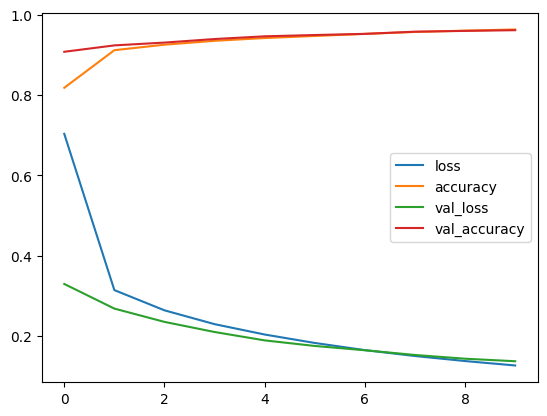

In [20]:
# visualising the training history
result.plot()

In [21]:
# prediction on test data
# to make predictions with the trained model on the test dataset X_test
y_pred=model.predict(X_test)

'''
313/313: This indicates that the prediction process has been completed for all 313 batches of data.
The number 313 is the total number of batches that the test data was split 
into for the prediction process.
'''

313/313 [==============================] - 0s 1ms/step


'\n313/313: This indicates that the prediction process has been completed for all 313 batches of data.\nThe number 313 is the total number of batches that the test data was split \ninto for the prediction process.\n'

In [22]:
# print the predicted values
y_pred

'''
y_pred, will be an array containing the predicted probabilities or 
class labels for each instance in the X_test dataset. 

 model is a classification model with a softmax activation function in the last layer 
(as is common with MNIST), y_pred will contain a probability distribution over 
the classes for each instance. 

use these probabilities to determine the most likely class 
for each instance by selecting the class with the highest probability.
'''

'\ny_pred, will be an array containing the predicted probabilities or \nclass labels for each instance in the X_test dataset. \n\n model is a classification model with a softmax activation function in the last layer \n(as is common with MNIST), y_pred will contain a probability distribution over \nthe classes for each instance. \n\nuse these probabilities to determine the most likely class \nfor each instance by selecting the class with the highest probability.\n'

In [23]:
# check shape
y_pred.shape

(10000, 10)

# Test for a random sample

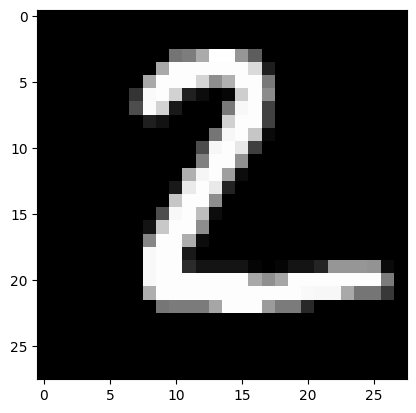

In [24]:
plt.imshow(X_test[1],cmap='gray')

In [25]:
y_test[1]

2

In [26]:
# prediction probability for each digit
y_pred[1]

array([8.7541885e-05, 8.2914848e-05, 9.9000812e-01, 9.5252506e-03,
       9.4908559e-10, 9.7444936e-05, 9.1153379e-05, 4.7601407e-09,
       1.0760342e-04, 2.9728602e-09], dtype=float32)

In [27]:
# predicted digit for the given test sample will be the one with highest prediction probability
np.argmax(y_pred[1])

2

In [28]:
# getting predicted labels (predicted hand written digits) for all the test samples
final_y_predicted=np.argmax(y_pred,axis=1)
final_y_predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
# Evaluate
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, final_y_predicted)

Text(92.25, 0.5, 'Actual  digit')

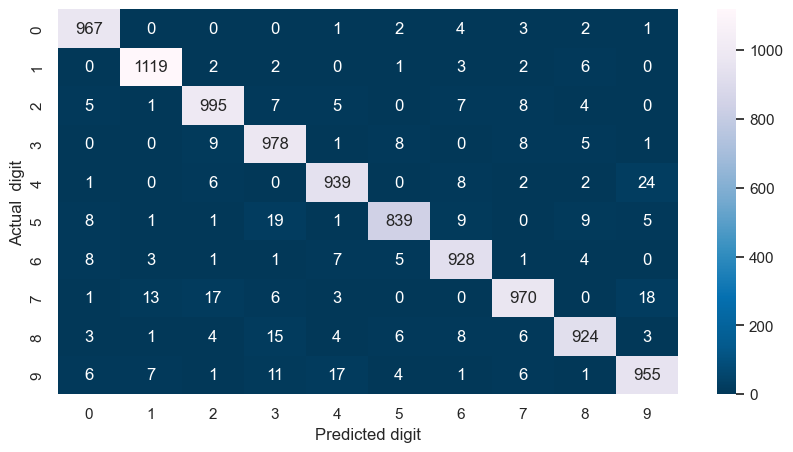

In [30]:
# confusion matrix using seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit") 

In [31]:
# print classwise precision recall f1 score
from sklearn.metrics import classification_report
print(classification_report(y_test,final_y_predicted))

'''
Precision: This measures the accuracy of the positive predictions. 
It is the ratio of true positive predictions to the total predicted positives 
(true positives + false positives). 
In mathematical terms, precision is defined as:
Precision=(True Positives)/(True Positives+False Positives)

Recall: Also known as sensitivity, it measures the ability of the model to find all the relevant cases
within a dataset. 
It is the ratio of true positive predictions to the actual positives (true positives + false negatives)
Mathematically, recall is:
Recall=(True Positives)/(True Positives+False Negatives)

F1-score: This is the harmonic mean of precision and recall and is used as a combined metric 
for these two. It is particularly useful when the class distribution is imbalanced. 
The F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0.


support:  refers to the number of actual occurrences of each class in the specified dataset1. 
It’s essentially the count of true instances for each label.
'''


'''
Infering the below scores:
Precision: For each class, the precision is close to or above 0.95, 
which means that when the model predicts a class, it is correct about 95% of the time or more. 
For example, when the model predicts an image to be a ‘0’, it is correct 97% of the time.

Recall: The recall values are also high, close to or above 0.93, indicating that the model is 
able to identify 93% or more of all actual instances of each class. 
For instance, out of all the actual '0’s in the test set, the model correctly identifies 98% of them.

F1-score: The F1-scores are the harmonic mean of precision and recall, and they are also high,
which suggests a good balance between precision and recall. 
An F1-score of 0.97 for class ‘0’ means that the balance between precision and recall for 
predicting zeros is excellent.

Support: This shows the number of actual occurrences of each class in the test set. 
For example, there are 980 instances of the class ‘0’.

Accuracy: The overall accuracy of the model on the test set is 0.96, 
meaning it correctly predicts the class 96% of the time across all classes.

Macro avg: The macro average calculates metrics for each class independently and 
then takes the average. This treats all classes equally, regardless of their support.

Weighted avg: The weighted average takes into account the support of each class. 
This means that the contribution of each class to the average is weighted by the number of 
true instances for each class.

Overall, these values suggest that your model performs very well on the MNIST dataset, 
with high precision, recall, and F1-scores across all classes. 
The high accuracy indicates that the model is very effective at classifying handwritten digits.

'''

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.94      0.96       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



"\nInfering the below scores:\nPrecision: For each class, the precision is close to or above 0.95, \nwhich means that when the model predicts a class, it is correct about 95% of the time or more. \nFor example, when the model predicts an image to be a ‘0’, it is correct 97% of the time.\n\nRecall: The recall values are also high, close to or above 0.93, indicating that the model is \nable to identify 93% or more of all actual instances of each class. \nFor instance, out of all the actual '0’s in the test set, the model correctly identifies 98% of them.\n\nF1-score: The F1-scores are the harmonic mean of precision and recall, and they are also high,\nwhich suggests a good balance between precision and recall. \nAn F1-score of 0.97 for class ‘0’ means that the balance between precision and recall for \npredicting zeros is excellent.\n\nSupport: This shows the number of actual occurrences of each class in the test set. \nFor example, there are 980 instances of the class ‘0’.\n\nAccuracy: 

# Save and load

In [32]:
model.save("savemodel.h5")

'''
save the entire trained model to a single HDF5 file. This file will include:

The architecture of the model, allowing to re-create the model.
The weights of the model.
The training configuration (loss, optimizer).
The state of the optimizer, allowing to resume training exactly where you left off.
'''

'\nsave the entire trained model to a single HDF5 file. This file will include:\n\nThe architecture of the model, allowing to re-create the model.\nThe weights of the model.\nThe training configuration (loss, optimizer).\nThe state of the optimizer, allowing to resume training exactly where you left off.\n'

In [33]:
from tensorflow.keras.models import load_model
# load model

#loads the trained model saved in the file savemodel.h5.
model = load_model('savemodel.h5')

#uses it to predict the output for the test data X_test. 
#The result, load_pred, will be an array of predictions.
load_pred = model.predict(X_test)

#Since model.predict() returns a probability distribution for each instance, np.argmax() 
#is used to find the index of the maximum value along axis 1
load_pred = np.argmax(load_pred,axis=1)

#prints out a classification report comparing the true labels y_test 
#with the predicted labels load_pred. 
#The report includes precision, recall, F1-score, and support for each class.
print(classification_report(y_test,load_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.94      0.96       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.97      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [34]:
# Model check point and early stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "bestcheckpoint.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=callbacks_list)

Epoch 1/10
1479/1500 [============================>.] - ETA: 0s - loss: 0.1175 - accuracy: 0.9663
Epoch 1: val_accuracy improved from -inf to 0.96200, saving model to bestcheckpoint.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1175 - accuracy: 0.9663 - val_loss: 0.1326 - val_accuracy: 0.9620
Epoch 2/10
1483/1500 [============================>.] - ETA: 0s - loss: 0.1091 - accuracy: 0.9692
Epoch 2: val_accuracy improved from 0.96200 to 0.96367, saving model to bestcheckpoint.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1093 - accuracy: 0.9693 - val_loss: 0.1283 - val_accuracy: 0.9637
Epoch 3/10
1498/1500 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9711
Epoch 3: val_accuracy improved from 0.96367 to 0.96525, saving model to bestcheckpoint.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1016 - accuracy: 0.9711 - val_loss: 0.1214 - val_accuracy: 0.9653
Epoch 4/10
1491/1500 [==================

In [35]:
from tensorflow.keras.models import load_model
# load model
model = load_model('bestcheckpoint.h5')
load_pred = model.predict(X_test)
load_pred = np.argmax(load_pred,axis=1)
print(classification_report(y_test,load_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [36]:
filepath = "earlystopping.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=2)
callbacks_list = [checkpoint, es]
model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=callbacks_list)

Epoch 1/10
1490/1500 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9833
Epoch 1: val_accuracy improved from -inf to 0.97133, saving model to earlystopping.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0633 - accuracy: 0.9834 - val_loss: 0.1004 - val_accuracy: 0.9713
Epoch 2/10
1494/1500 [============================>.] - ETA: 0s - loss: 0.0599 - accuracy: 0.9841
Epoch 2: val_accuracy improved from 0.97133 to 0.97200, saving model to earlystopping.h5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9842 - val_loss: 0.0965 - val_accuracy: 0.9720
Epoch 3/10
1496/1500 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9853
Epoch 3: val_accuracy did not improve from 0.97200
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0570 - accuracy: 0.9852 - val_loss: 0.0969 - val_accuracy: 0.9720
Epoch 4/10
1492/1500 [============================>.] - ETA: 0s - loss: 0.0543 - 

In [37]:
from tensorflow.keras.models import load_model
# load model
model = load_model('earlystopping.h5')
load_pred = model.predict(X_test)
load_pred = np.argmax(load_pred,axis=1)
print(classification_report(y_test,load_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

